In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
zero_count = (df == 0).sum()

print(zero_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    m = df[column].median()
    df[column] = df[column].replace(0, m)

In [8]:
zero_count = (df == 0).sum()

print(zero_count)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [10]:
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=2)

model.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [12]:
pred = model.predict(X)

In [14]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, pred))

0.8372395833333334


## Own KNN

In [19]:
import numpy as np

def euclidean(x1, x2):
    sum=0
    for a,b in zip(x1, x2):
        sum+=(a-b)**2
    return np.sqrt(sum)


class KNN:
    def __init__(self, k):
        self.k=k
        
    def fit(self, X, y):
        self.X_train=X
        self.y_train=y
    
    def predict(self, X_test):
        pred=[]
        for x in X_test:
            pred.append(self.predict_single(x))
        return pred
    
    def predict_single(self, x):
        distances = [euclidean(x, a) for a in self.X_train]
        sorted_indices = np.argsort(distances)
        k_indices=sorted_indices[:self.k]
        k_classes=[self.y_train[idx] for idx in k_indices]
        prediction = max(set(k_classes), key = k_classes.count)
        return prediction
    
model = KNN(2)
model.fit(X, y)

pred = model.predict(X)

In [20]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, pred))

0.8372395833333334


In [26]:
def find_best_k(X_train, y_train, max_k=5):
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_train)
        accuracy = accuracy_score(y_train, y_pred)
        accuracies.append(accuracy)
        print(f"k={k}, Accuracy={accuracy}")
    return accuracies

In [27]:
accuracies = find_best_k(X, y)
best_k = np.argmax(accuracies)+1
print(f"Best k value: {best_k}")

k=1, Accuracy=1.0
k=2, Accuracy=0.8372395833333334
k=3, Accuracy=0.8619791666666666
k=4, Accuracy=0.8151041666666666
k=5, Accuracy=0.7994791666666666
Best k value: 1


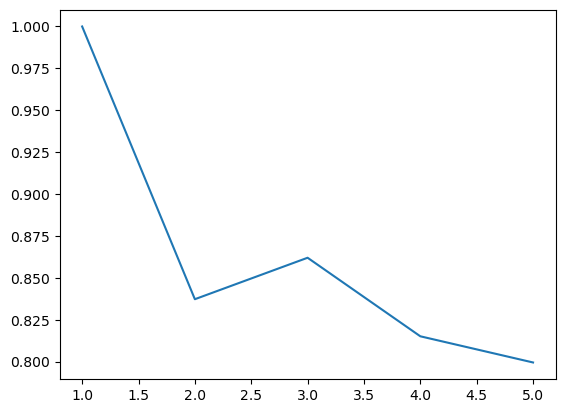

In [28]:
import matplotlib.pyplot as plt

plt.plot(range(1,6), accuracies)
plt.show()